In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [22]:
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break

In [23]:
df = pd.read_csv(csv_file_path)

In [24]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
df.duplicated().sum()

0

In [27]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
X = df.drop(['CustomerID', 'Age', 'Gender'], axis=1) # Combine all columns to drop into a single list

In [29]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=4)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [32]:
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 66674.36000494969,
 37233.81451071002,
 31616.505443611783,
 28103.233893883895,
 22858.450633665852,
 21278.290913541012]

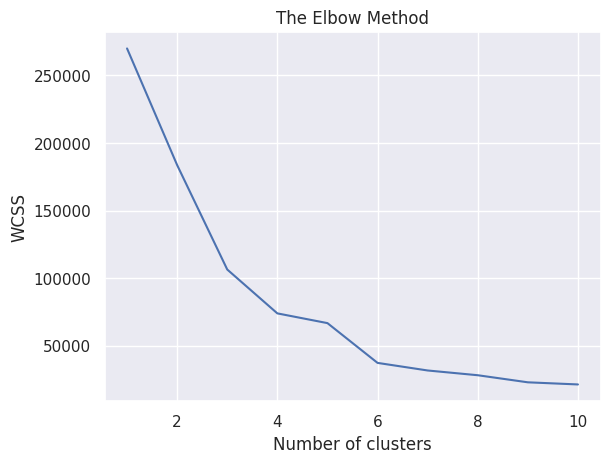

In [33]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
km = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_pred = km.fit_predict(X)


In [35]:
y_pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

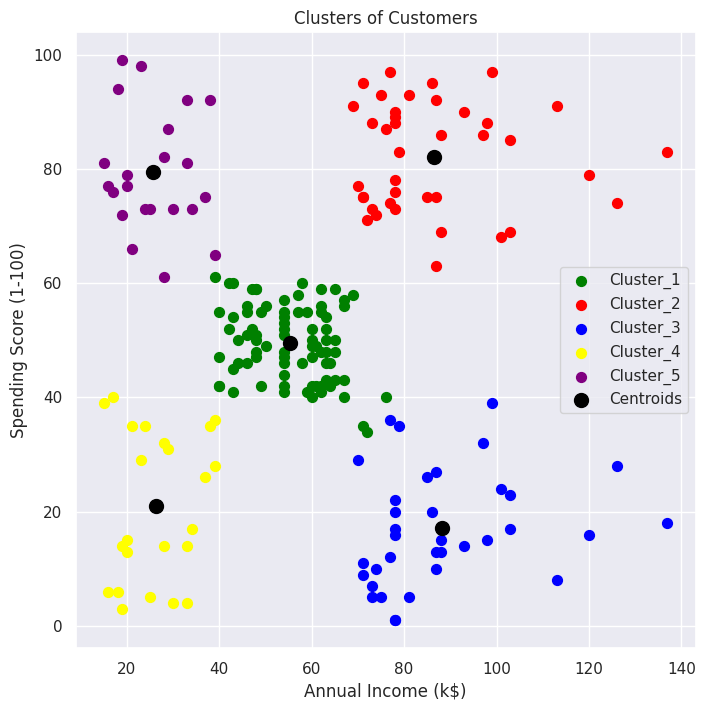

In [48]:
plt.figure(figsize=(8, 8))

plt.scatter(X.loc[y_pred == 0, X.columns[0]], X.loc[y_pred == 0, X.columns[1]], s=50, c='green', label='Cluster_1')
plt.scatter(X.loc[y_pred == 1, X.columns[0]], X.loc[y_pred == 1, X.columns[1]], s=50, c='red', label='Cluster_2')
plt.scatter(X.loc[y_pred == 2, X.columns[0]], X.loc[y_pred == 2, X.columns[1]], s=50, c='blue', label='Cluster_3')
plt.scatter(X.loc[y_pred == 3, X.columns[0]], X.loc[y_pred == 3, X.columns[1]], s=50, c='yellow', label='Cluster_4')
plt.scatter(X.loc[y_pred == 4, X.columns[0]], X.loc[y_pred == 4, X.columns[1]], s=50, c='purple', label='Cluster_5')

# Corrected line to plot centroids:
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, c='black', label='Centroids') # Use correct slicing to get x and y coordinates of centroids
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [53]:
import plotly.express as px
df = pd.DataFrame()

df['col1'] = X[X.columns[0]].tolist() # Access the first column of X using its name
df['col2'] = X[X.columns[1]].tolist() # Access the second column of X using its name
df['label'] = y_pred
fig = px.scatter_3d(df,x='col1', y='col2', z='label',color='label')
fig.show()